In [22]:
"For data magic: the actual work"
import pandas as pd #the main magic thing :) 
import numpy as np #to work in arrays instead of lists
import csv          #This helps generating dataframes in pandas
import matplotlib.pyplot as plt #eyes over brains
from sklearn import preprocessing #for label encoding
le = preprocessing.LabelEncoder()
import seaborn as sn ##correlations,quick plots etc.
from scipy import stats #quick solutions with lists if pandas is long


"Naming files and administration magic"
import time #always handy to have a time import ready
import os #to rename filenames
import shutil #to move files when used with os

In [2]:
df = pd.read_csv('data/DA_titanic_train.csv')
#df.head(20)

In [21]:
colnames = list(df.columns)
for i in range((len(df.columns))):
    col = df.iloc[:, i]
    print(('nullvalues in '+colnames[i]+' ='+str(col.isnull().sum())))
print('\n\nWe miss a lot of data from cabins, we will drop this column')

df = df.dropna( how='any',
                    subset=['Embarked'])

a =list(set(df['Ticket']))
print(len(df['Ticket']))
print(len(a))
print('Some people have the same ticket for multiple passengers! \nLets find who and solve this issue!')

nullvalues in Survived =0
nullvalues in Age =0
nullvalues in SibSp =0
nullvalues in Parch =0
nullvalues in Price =0
nullvalues in Embarked_C =0
nullvalues in Embarked_Q =0
nullvalues in Embarked_S =0
nullvalues in Title_Master =0
nullvalues in Title_Miss =0
nullvalues in Title_Mr =0
nullvalues in Title_Mrs =0
nullvalues in Pclass_1 =0
nullvalues in Pclass_2 =0
nullvalues in Pclass_3 =0


We miss a lot of data from cabins, we will drop this column


### I had to drop this as other methotds were simpler ### 
ticketlist = list(df['Ticket'])
grouptickets = []
for i in range(len(ticketlist)):
    for j in range(len(ticketlist)):
        if i != j and ticketlist[i] == ticketlist[j]:
            match = [i, j]
            #print(match)
            grouptickets.append(match)


In [9]:
df['freq'] = df.groupby('Ticket')['Ticket'].transform('count')

df['Price'] = df['Fare']/df['freq']

df['Title'] = df['Name'].astype(str).str.split().str[1]
df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            5         0       3   
4           10         1       2   
5           11         1       3   
6           13         0       3   
7           14         0       3   
8           15         0       3   
9           16         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3                           Allen, Mr. William Henry    male  35.0      0   
4                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
5                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
6                     Saundercock, Mr. William Henry    male  20.0      0   
7                        Andersson, Mr. Anders Johan    male  39.0      1   
8               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
9                    Hewlett, Mrs. (Mary D Kingcome)  female  55.0      0   

   Parch            Ticket     Fare Cabin Embarked  freq    Price  Title  
0      0         A/5 21171   7.2500   NaN        S     1   7.2500    Mr.  
1      0          PC 17599  71.2833   C85        C     1  71.2833   Mrs.  
2      0  STON/O2. 3101282   7.9250   NaN        S     1   7.9250  Miss.  
3      0            373450   8.0500   NaN        S     1   8.0500    Mr.  
4      0            237736  30.0708   NaN        C     1  30.0708   Mrs.  
5      1           PP 9549  16.7000    G6        S     2   8.3500  Miss.  
6      0         A/5. 2151   8.0500   NaN        S     1   8.0500    Mr.  
7      5            347082  31.2750   NaN        S     5   6.2550    Mr.  
8      0            350406   7.8542   NaN        S     1   7.8542  Miss.  
9      0            248706  16.0000   NaN        S     1  16.0000   Mrs.

In [10]:
titlegroups= df.groupby('Title')['PassengerId'].nunique()
titlegroups.unique

In [12]:
#BRUTEFORCE
df.loc[df['Title'] == "Gordon,", "Title"] = "Mr"
df.loc[df['Title'] == "y", "Title"] = "Mr"
df.loc[df['Title'] == "the,", "Title"] = "Mr"
df.loc[df['Title'] == "the", "Title"] = "Mr"
df.loc[df['Title'] == "Mr.", "Title"] = "Mr"
df.loc[df['Title'] == "Mrs.", "Title"] = "Mrs"
df.loc[df['Title'] == "Miss.", "Title"] = "Miss"
df.loc[df['Title'] == "Master.", "Title"] = "Master"
df.loc[df['Title'] == "Planke,", "Title"] = "Mr"
df.loc[df['Title'] == "Don.", "Title"] = "Mr"
df.loc[df['Title'] == "Don,", "Title"] = "Mr"
df.loc[df['Title'] == "Rev.", "Title"] = "Mr"
df.loc[df['Title'] == "Walle,", "Title"] = "Mr"
df.loc[df['Title'] == "Pelsmaeker,", "Title"] = "Mr"
df.loc[df['Title'] == "Mulder,", "Title"] = "Mr"
df.loc[df['Title'] == "Dr.", "Title"] = "Mr"
df.loc[df['Title'] == "Steen,", "Title"] = "Mr"
df.loc[df['Title'] == "Carlo,", "Title"] = "Mr"
df.loc[df['Title'] == "Impe,", "Title"] = "Mr"
df.loc[df['Title'] == "Ms.", "Title"] = "Mr"
df.loc[df['Title'] == "Major.", "Title"] = "Mr"
df.loc[df['Title'] == "Mr", "Title"] = "Mr"
df.loc[df['Title'] == "Messemaeker,", "Title"] = "Mr"
df.loc[df['Title'] == "Mlle.", "Title"] = "Mr"
df.loc[df['Title'] == "Col.", "Title"] = "Mr"
df.loc[df['Title'] == "Capt.", "Title"] = "Mr"
df.loc[df['Title'] == "Velde", "Title"] = "Mr"
df.loc[df['Title'] == "Velde,", "Title"] = "Mr"
df.loc[df['Title'] == "Shawah,", "Title"] = "Mr"
df.loc[df['Title'] == "Jonkheer,", "Title"] = "Mr"
df.loc[df['Title'] == "Jonkheer.", "Title"] = "Mr"
df.loc[df['Title'] == "Melkebeke,", "Title"] = "Mr"
df.Title.unique()

In [14]:
#BRUTEFORCE
ladies = df.loc[df['Title'] == 'Miss']
ladies['Age'].fillna((ladies['Age'].mean()), inplace=True)

women = df.loc[df['Title'] == 'Mrs']
women['Age'].fillna((women['Age'].mean()), inplace=True)

men = df.loc[df['Title'] == 'Mr']
men['Age'].fillna((men['Age'].mean()), inplace=True)

masters = df.loc[df['Title'] == 'Master']
masters['Age'].fillna((masters['Age'].mean()), inplace=True)

df = pd.concat([ladies, women, men, masters])
df = df.drop(columns=['Name', 'Cabin','Ticket','Fare','PassengerId','Sex','freq'])
df

C:\Users\Bandi\Miniconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Survived  Pclass        Age  SibSp  Parch Embarked     Price   Title
2           1       3  26.000000      0      0        S   7.92500    Miss
5           1       3   4.000000      1      1        S   8.35000    Miss
8           0       3  14.000000      0      0        S   7.85420    Miss
15          0       3   8.000000      3      1        S   7.02500    Miss
18          1       3  21.142857      0      0        Q   7.87920    Miss
..        ...     ...        ...    ...    ...      ...       ...     ...
575         0       3   2.000000      4      1        S   7.93750  Master
577         1       2   1.000000      0      2        C  18.50210  Master
581         1       2   0.830000      1      1        S   6.25000  Master
594         0       3   4.000000      4      2        S   6.25500  Master
610         1       3   4.000000      1      1        S   5.56665  Master

[623 rows x 8 columns]

In [16]:
df = pd.get_dummies(df, columns=["Embarked"])
df = pd.get_dummies(df, columns=["Title"])
df["Pclass"] = df["Pclass"].astype(str)
df = pd.get_dummies(df, columns=["Pclass"])
df.head()

Survived        Age  SibSp  Parch   Price  Embarked_C  Embarked_Q  \
2          1  26.000000      0      0  7.9250           0           0   
5          1   4.000000      1      1  8.3500           0           0   
8          0  14.000000      0      0  7.8542           0           0   
15         0   8.000000      3      1  7.0250           0           0   
18         1  21.142857      0      0  7.8792           0           1   

    Embarked_S  Title_Master  Title_Miss  Title_Mr  Title_Mrs  Pclass_1  \
2            1             0           1         0          0         0   
5            1             0           1         0          0         0   
8            1             0           1         0          0         0   
15           1             0           1         0          0         0   
18           0             0           1         0          0         0   

    Pclass_2  Pclass_3  
2          0         1  
5          0         1  
8          0         1  
15         0         1  
18         0         1

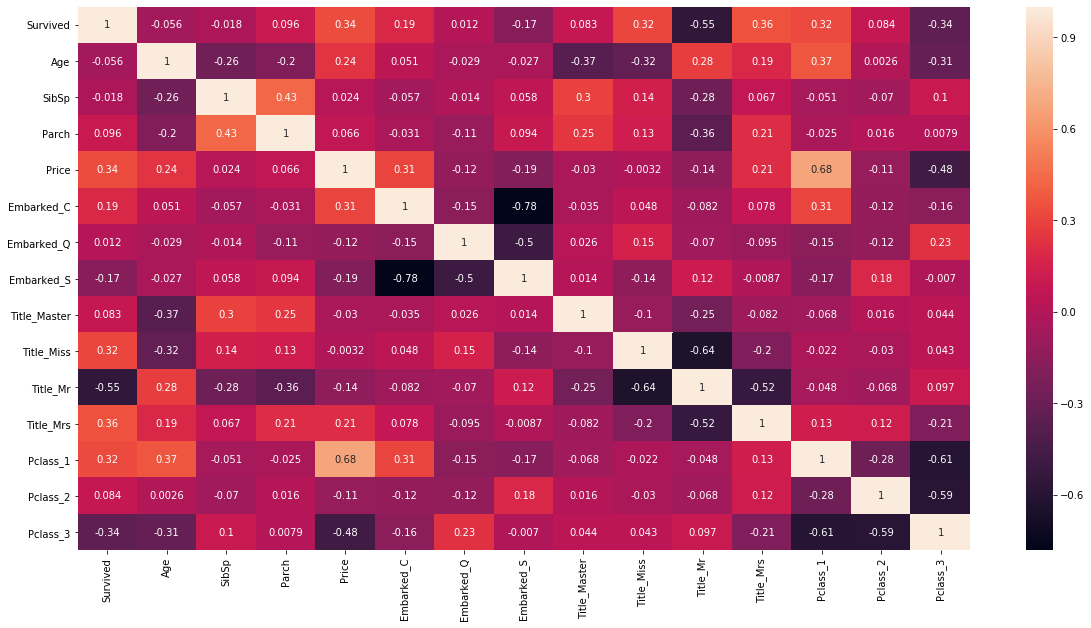

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [38]:
target = df['Survived']
train_data = df.drop(columns=['Survived'])
train_data
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_data,target,test_size=0.25,random_state=0)

My method to use: 
https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [41]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\Bandi\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[84, 11],
       [16, 45]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

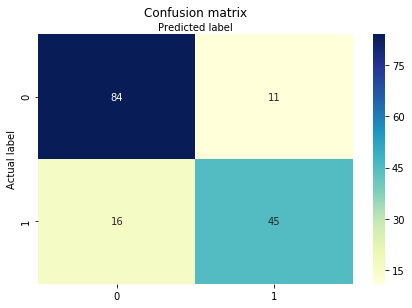

In [43]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8269230769230769
Precision: 0.8035714285714286
Recall: 0.7377049180327869


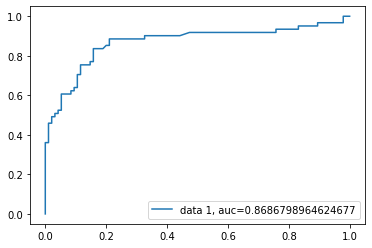

In [45]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()